In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\User\\Downloads\\movie_data\\movies.csv")

In [3]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## What is the shape of "movies.csv"?


In [4]:
df.shape

(9742, 3)

In [5]:
df1=pd.read_csv("C:\\Users\\User\\Downloads\\movie_data\\ratings.csv")

In [6]:
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## What is the shape of "ratings.csv"?


In [7]:
df1.shape

(100836, 4)

## How many unique "userId" are available in "ratings.csv"?


In [8]:
df1["userId"].nunique()

610

In [9]:
df1.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [10]:
df2=pd.merge(df,df1,on="movieId")

In [11]:
df2

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


## Which movie has recieved maximum number of user ratings?


In [30]:
counts = df2.groupby("title")["rating"].count()
max_count = counts.sort_values(ascending=False).head(1)
print(max_count)

title
Forrest Gump (1994)    329
Name: rating, dtype: int64


## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [12]:
tags=pd.read_csv("C:\\Users\\User\\Downloads\\movie_data\\tags.csv")

In [13]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
df3=pd.merge(df,tags,on="movieId")

In [15]:
df3

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [16]:
Matrix= df3[(df3['title']== "Matrix, The (1999)")]['tag']
Matrix

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [17]:
terminator_df = df2[df2['title'] == 'Terminator 2: Judgment Day (1991)']
average_rating = terminator_df['rating'].mean()
print(average_rating)

3.970982142857143


## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='rating', ylabel='Density'>

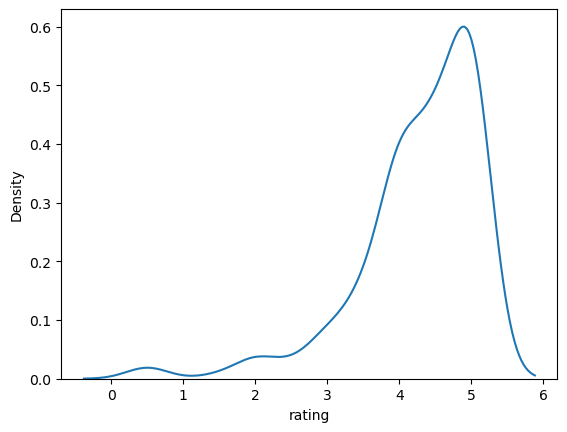

In [20]:
data = df2[df2["title"]=='Fight Club (1999)']
sns.kdeplot(data["rating"])

## Mandatory Operations

In [21]:
#step 1: apply groupby vased on count and mean
grouped_ratings = df1.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

print(grouped_ratings)

      movieId  count      mean
0           1    215  3.920930
1           2    110  3.431818
2           3     52  3.259615
3           4      7  2.357143
4           5     49  3.071429
...       ...    ...       ...
9719   193581      1  4.000000
9720   193583      1  3.500000
9721   193585      1  3.500000
9722   193587      1  3.500000
9723   193609      1  4.000000

[9724 rows x 3 columns]


In [22]:
#Step 2: Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(df, grouped_ratings, on='movieId', how='inner')
print(merged_df)
#Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['count'] > 50]
print(filtered_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                      Adventure|Children|Fantasy    110  3.431818  
2                                  Comedy|Romance     52  3.259615  
3  

## Which movie is the most popular based on  average user ratings?


In [23]:
filtered_df['mean'].max()

4.429022082018927

In [24]:
filtered_df[filtered_df['mean']==4.429022082018927]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


## Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [25]:
top_10_movies = filtered_df.nlargest(10, 'mean')
top_10_movies

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
686,904,Rear Window (1954),Mystery|Thriller,84,4.261905
921,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690
6298,48516,"Departed, The (2006)",Crime|Drama|Thriller,107,4.252336
913,1213,Goodfellas (1990),Crime|Drama,126,4.250000
694,912,Casablanca (1942),Drama|Romance,100,4.240000


In [26]:
top_5_movies = filtered_df.nlargest(5, 'count')
top_5_movies

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [27]:
sci_fi_movies = filtered_df[merged_df['genres'].str.contains('Sci-Fi')]
sci_fi_movies


C:\Users\User\AppData\Local\Temp\ipykernel_15444\2674280802.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sci_fi_movies = filtered_df[merged_df['genres'].str.contains('Sci-Fi')]


,movieId,title,genres,count,mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [28]:
top_5_movies = sci_fi_movies.nlargest(5, 'count')
top_5_movies

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


In [33]:
df4=pd.read_csv("C:\\Users\\User\\Downloads\\movie_data\\links.csv")
df4

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [32]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [34]:
merged_df2 = pd.merge(filtered_df, df4, on='movieId', how='inner')
merged_df2

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [35]:
a=merged_df2['imdbId']
b=list(a)
b

[114709,
 113497,
 113228,
 113277,
 114319,
 113189,
 112346,
 112641,
 114388,
 112281,
 113161,
 113627,
 114746,
 112431,
 112818,
 112697,
 114369,
 114148,
 114814,
 113862,
 116367,
 115759,
 116483,
 112573,
 75314,
 115685,
 112442,
 112384,
 112462,
 112642,
 112715,
 112740,
 112851,
 112864,
 113071,
 113481,
 113492,
 113957,
 114898,
 109445,
 109635,
 109686,
 109707,
 110148,
 76759,
 110322,
 110632,
 114069,
 110413,
 110912,
 110932,
 111282,
 111070,
 111161,
 111280,
 108550,
 114924,
 109040,
 109444,
 109446,
 109506,
 109830,
 109831,
 110357,
 110475,
 110478,
 110622,
 111257,
 111503,
 106220,
 109254,
 109439,
 106582,
 106598,
 106673,
 106697,
 106918,
 106977,
 107144,
 107206,
 107290,
 107362,
 107614,
 107818,
 107822,
 107977,
 108052,
 108160,
 83658,
 107688,
 108333,
 108358,
 108399,
 99785,
 99653,
 103639,
 103064,
 99348,
 96895,
 102926,
 29583,
 101414,
 32910,
 100405,
 116282,
 117060,
 116136,
 117705,
 117979,
 117500,
 117998,
 57012,
 1

In [39]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

reviews = []
rating = []

for i in b:
    id = str(i)
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    print(response)

    soup = BeautifulSoup(response.text, 'html.parser')

    imdb_rating = soup.find_all('a', class_='ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview')

    res = []
    for i in imdb_rating:
        a = i.find('span', class_='score')
        print(i)
        if a:
            regex = re.findall('\d+', a.text)
            res.append(regex[0])
        else:
            res.append(np.nan)

    reviews.append(res[0])

    imdb_ratings = soup.find('span', class_='sc-bde20123-1 cMEQkK')
    if imdb_ratings:
        rating.append(imdb_ratings.text)
    else:
        rating.append(np.nan)

<Response [200]>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/reviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score">778</span><span class="label">User reviews</span></span></a>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/externalreviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score">168</span><span class="label">Critic reviews</span></span></a>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/criticreviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score"><span class="sc-b0901df4-0 bcQdDJ metacritic-score-box" style="background-color:#54A72A">96</span></span><span class="label"><span class=

In [40]:
print(len(rating))
len(reviews)

436


436

In [41]:
merged_df2

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [42]:
merged_df2['rating']= rating
merged_df2['reviews']= reviews
merged_df2['rating']= merged_df2['rating'].astype('float64')
top_5_movies = merged_df2.nlargest(5, 'rating')

# Display the resulting DataFrame
top_5_movies

,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3,10
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2,5
86,527,Schindler's List (1993),Drama|War,220,4.225000,108052,424.0,9.0,2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0,2
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0,1


In [43]:
sci_fi_movies2 = merged_df2[merged_df2['genres'].str.contains('Sci-Fi')]
sci_fi_movies2

,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0,8.0,766
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3,211
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6,198
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6,308
38,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,114898,9804.0,6.3,463
...,...,...,...,...,...,...,...,...,...
427,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,848228,24428.0,8.0,2
428,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,1392170,70160.0,7.2,2
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7,5
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0,1


In [44]:
top_5_movies = sci_fi_movies2.nlargest(5, 'rating')

# Display the resulting DataFrame
top_5_movies

,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8,4
140,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0,8.7,1
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7,4
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7,5
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,76759,11.0,8.6,2
